In [1]:
%cd ../../auto-cat-crop/

/Users/washizakikai/dev/k-washi/git/auto-cat-crop


In [17]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [19]:
#model = torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)
model = models.vgg19(pretrained=True)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [20]:
data_path = "./dataset/images/Abyssinian_1.jpg"

In [21]:
img = Image.open(data_path)
img = img.convert("RGB")

&lt;matplotlib.image.AxesImage at 0x12b882a60&gt;

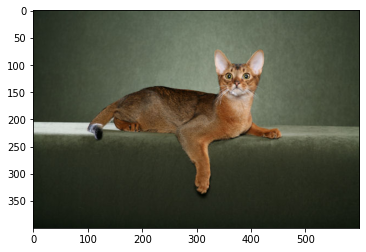

In [22]:
plt.imshow(img)

In [23]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


In [24]:
if device:
    input_batch = input_batch.to(device)
    model = model.to(device)

In [25]:
%time
with torch.no_grad():
    for _ in range(10):
    
        output = model(input_batch)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


In [26]:
#print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
#print(torch.nn.functional.softmax(output[0], dim=0))
torch.argmax(output[0])


tensor(285)

In [27]:
from cam.base_cam import ScoreCAM

In [29]:
vgg = models.vgg16(pretrained=True).eval()
vgg_model_dict = dict(type='vgg16', arch=vgg, layer_name='features_29',input_size=(224, 224))
vgg_scorecam = ScoreCAM(vgg_model_dict)

#input_image = load_image('images/'+'ILSVRC2012_val_00002193.JPEG')
#input_ = apply_transforms(input_image)
predicted_class = vgg(input_batch).max(1)[-1]



Downloading: &quot;https://download.pytorch.org/models/vgg16-397923af.pth&quot; to /Users/washizakikai/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [10:03&lt;00:00, 917kB/s] 


In [30]:
%time
scorecam_map = vgg_scorecam(input_batch)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


In [32]:
scorecam_map.shape

torch.Size([1, 1, 224, 224])

&lt;matplotlib.image.AxesImage at 0x12cfb0730&gt;

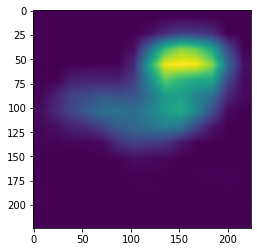

In [33]:
plt.imshow(scorecam_map[0][0])